TensorFlow: 2.10.1
PennyLane: 0.32.0
Loaded shapes:
 X_train: (994, 5, 10, 10, 24)
 y_train: (994, 10, 10, 7)
 X_val  : (213, 5, 10, 10, 24)
 y_val  : (213, 10, 10, 7)
 X_test : (214, 5, 10, 10, 24)
 y_test : (214, 10, 10, 7)
SO2 target shapes: (994, 10, 10, 1) (213, 10, 10, 1) (214, 10, 10, 1)
🚀 STARTING EXPERT 11: Advanced Quantum-Enhanced SO2 Predictor

TRAINING EXPERT 11: Advanced Quantum-Enhanced SO2 Predictor
Creating Expert 11 model...

Model Architecture:
Model: "Expert11_Advanced_Quantum_SO2"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 5, 10, 10,   0           []                               
                                24)]                                                              
                                                                                                 

Epoch 1/100
247/249 [============================>.] - ETA: 0s - loss: 0.0321 - mae: 0.1191 - mse: 0.0321
Epoch 1: val_loss improved from inf to 0.03217, saving model to C:\Users\NNadi\Downloads\Air_pollution_Agentic_AI\models\expert11_output\expert11_best_model


INFO:tensorflow:Assets written to: C:\Users\NNadi\Downloads\Air_pollution_Agentic_AI\models\expert11_output\expert11_best_model\assets


INFO:tensorflow:Assets written to: C:\Users\NNadi\Downloads\Air_pollution_Agentic_AI\models\expert11_output\expert11_best_model\assets


249/249 [==============================] - 11s 39ms/step - loss: 0.0320 - mae: 0.1187 - mse: 0.0320 - val_loss: 0.0322 - val_mae: 0.1048 - val_mse: 0.0322 - lr: 0.0010
Epoch 2/100
249/249 [==============================] - ETA: 0s - loss: 0.0111 - mae: 0.0766 - mse: 0.0111
Epoch 2: val_loss did not improve from 0.03217
249/249 [==============================] - 7s 27ms/step - loss: 0.0111 - mae: 0.0766 - mse: 0.0111 - val_loss: 0.0691 - val_mae: 0.1082 - val_mse: 0.0691 - lr: 0.0010
Epoch 3/100
249/249 [==============================] - ETA: 0s - loss: 0.0046 - mae: 0.0516 - mse: 0.0046
Epoch 3: val_loss did not improve from 0.03217
249/249 [==============================] - 7s 30ms/step - loss: 0.0046 - mae: 0.0516 - mse: 0.0046 - val_loss: 0.0728 - val_mae: 0.1006 - val_mse: 0.0728 - lr: 0.0010
Epoch 4/100
247/249 [============================>.] - ETA: 0s - loss: 0.0056 - mae: 0.0499 - mse: 0.0056
Epoch 4: val_loss did not improve from 0.03217
249/249 [==============================

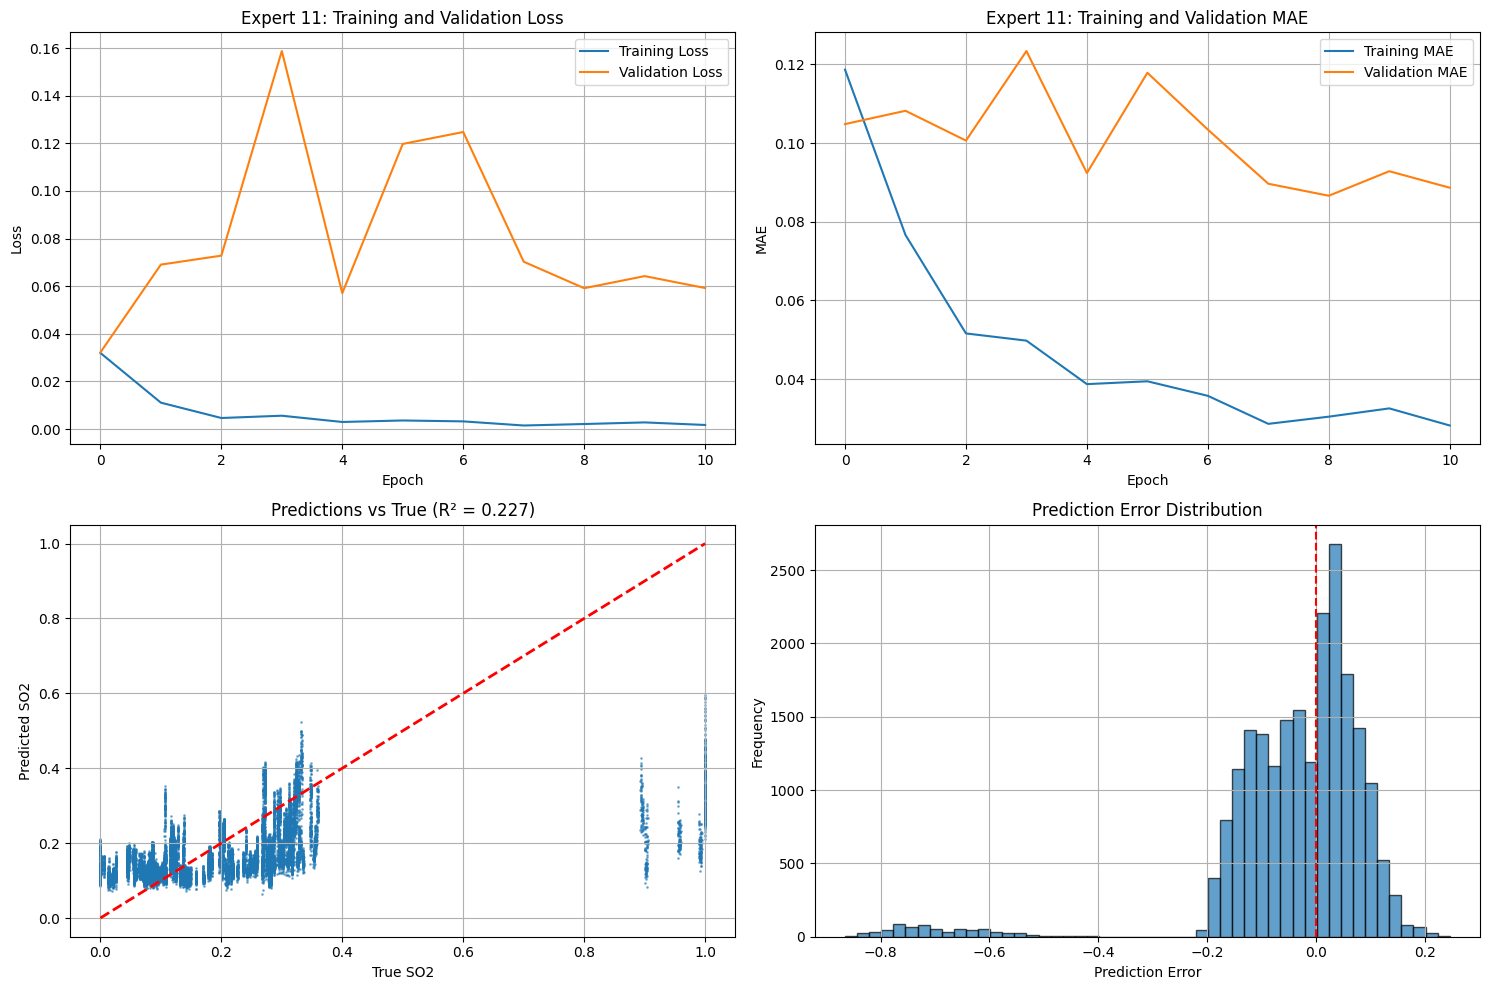

INFO:tensorflow:Assets written to: C:\Users\NNadi\Downloads\Air_pollution_Agentic_AI\models\expert11_output\expert11_final_model\assets


INFO:tensorflow:Assets written to: C:\Users\NNadi\Downloads\Air_pollution_Agentic_AI\models\expert11_output\expert11_final_model\assets



💾 Expert 11 saved successfully!
   Model: C:\Users\NNadi\Downloads\Air_pollution_Agentic_AI\models\expert11_output/expert11_final_model/ (TensorFlow format)
   Weights: C:\Users\NNadi\Downloads\Air_pollution_Agentic_AI\models\expert11_output/expert11_weights.h5
   Metadata: C:\Users\NNadi\Downloads\Air_pollution_Agentic_AI\models\expert11_output/expert11_metadata.json

✅ EXPERT 11 COMPLETED SUCCESSFULLY!
📁 Model ready for ensemble stacking!

🧪 Testing model loading...
✅ Model loaded successfully for ensemble integration!


In [1]:
# Expert 11: Advanced Quantum-Enhanced SO2 Predictor
# Using TensorFlow SavedModel format for subclassed models

import os
os.environ['CUDA_VISIBLE_DEVICES'] = ''  # comment out to enable GPU

import time
import json
import numpy as np
import pennylane as qml
import tensorflow as tf
from tensorflow.keras import layers, Model, optimizers, callbacks
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
import matplotlib.pyplot as plt

# ----------------------------
# CONFIG
# ----------------------------
DATA_DIR = r"C:\Users\NNadi\Downloads\Air_pollution_Agentic_AI\datasets"
OUTPUT_DIR = r"C:\Users\NNadi\Downloads\Air_pollution_Agentic_AI\models\expert11_output"
os.makedirs(OUTPUT_DIR, exist_ok=True)

SEQ_LEN = 5
PATCH_SIZE = 10
CHANNELS = 24
PRED_BAND_IDX = 3  # Changed from 2 (NO2) to 3 (SO2)
NUM_QUBITS = 4
Q_DEPTH = 2
EPOCHS = 100
BATCH_SIZE = 4
LR = 1e-3

np.random.seed(42)
tf.random.set_seed(42)

print("TensorFlow:", tf.__version__)
print("PennyLane:", qml.__version__)

# ----------------------------
# Load datasets
# ----------------------------

def load_npy(name):
    path = os.path.join(DATA_DIR, name)
    if not os.path.exists(path):
        raise FileNotFoundError(path)
    return np.load(path)

X_train = load_npy("X_train.npy")
y_train = load_npy("y_train.npy")
X_val = load_npy("X_val.npy")
y_val = load_npy("y_val.npy")
X_test = load_npy("X_test.npy")
y_test = load_npy("y_test.npy")

print("Loaded shapes:")
print(" X_train:", X_train.shape)
print(" y_train:", y_train.shape)
print(" X_val  :", X_val.shape)
print(" y_val  :", y_val.shape)
print(" X_test :", X_test.shape)
print(" y_test :", y_test.shape)

# Prepare SO2 targets
def extract_so2(y):
    so2 = y[..., PRED_BAND_IDX]
    return so2[..., None].astype(np.float32)

y_train_so2 = extract_so2(y_train)
y_val_so2 = extract_so2(y_val)
y_test_so2 = extract_so2(y_test)

print("SO2 target shapes:", y_train_so2.shape, y_val_so2.shape, y_test_so2.shape)

# ----------------------------
# Advanced Quantum-Enhanced Layer
# ----------------------------

class AdvancedQuantumLayer(layers.Layer):
    """Advanced quantum-inspired layer with entanglement simulation"""
    
    def __init__(self, units, use_entanglement=True, **kwargs):
        super().__init__(**kwargs)
        self.units = units
        self.use_entanglement = use_entanglement
        
    def build(self, input_shape):
        # Quantum-inspired weights with complex representation
        self.quantum_weights_real = self.add_weight(
            shape=(input_shape[-1], self.units),
            initializer='glorot_uniform',
            trainable=True,
            name='quantum_weights_real'
        )
        self.quantum_weights_imag = self.add_weight(
            shape=(input_shape[-1], self.units),
            initializer='glorot_uniform',
            trainable=True,
            name='quantum_weights_imag'
        )
        
        # Entanglement simulation weights
        if self.use_entanglement:
            self.entanglement_weights = self.add_weight(
                shape=(self.units, self.units),
                initializer='orthogonal',
                trainable=True,
                name='entanglement_weights'
            )
        
        self.bias = self.add_weight(
            shape=(self.units,),
            initializer='zeros',
            trainable=True,
            name='bias'
        )
        super().build(input_shape)
    
    def call(self, inputs):
        # Quantum-inspired transformation with complex operations
        real_part = tf.matmul(inputs, self.quantum_weights_real)
        imag_part = tf.matmul(inputs, self.quantum_weights_imag)
        
        # Quantum probability amplitude
        magnitude = tf.sqrt(real_part**2 + imag_part**2 + 1e-8)
        
        # Entanglement simulation
        if self.use_entanglement:
            entangled = tf.matmul(magnitude, self.entanglement_weights)
            magnitude = 0.7 * magnitude + 0.3 * entangled
        
        # Quantum-inspired activation
        output = magnitude + self.bias
        return tf.nn.swish(output)  # Smooth activation
    
    def get_config(self):
        config = super().get_config()
        config.update({
            "units": self.units,
            "use_entanglement": self.use_entanglement
        })
        return config

# ----------------------------
# Attention Mechanisms
# ----------------------------

class TemporalAttention(layers.Layer):
    """Temporal attention for sequence processing"""
    
    def __init__(self, units, **kwargs):
        super().__init__(**kwargs)
        self.units = units
        
    def build(self, input_shape):
        self.query = layers.Dense(self.units)
        self.key = layers.Dense(self.units)
        self.value = layers.Dense(self.units)
        super().build(input_shape)
    
    def call(self, inputs):
        # inputs shape: (batch, seq_len, features)
        q = self.query(inputs)
        k = self.key(inputs)
        v = self.value(inputs)
        
        # Scaled dot-product attention
        scores = tf.matmul(q, k, transpose_b=True)
        scores = scores / tf.math.sqrt(tf.cast(self.units, tf.float32))
        attention_weights = tf.nn.softmax(scores, axis=-1)
        
        # Apply attention
        output = tf.matmul(attention_weights, v)
        return output

class SpatialAttention(layers.Layer):
    """Spatial attention for patch processing"""
    
    def __init__(self, **kwargs):
        super().__init__(**kwargs)
        
    def build(self, input_shape):
        self.conv1 = layers.Conv2D(1, 1, activation='sigmoid')
        super().build(input_shape)
    
    def call(self, inputs):
        # inputs shape: (batch, height, width, channels)
        attention_weights = self.conv1(inputs)
        return inputs * attention_weights

# ----------------------------
# Expert 11 Model Architecture
# ----------------------------

def create_expert11_advanced_quantum():
    """Expert 11 with advanced quantum-enhanced architecture for SO2 prediction"""
    
    inputs = layers.Input(shape=(SEQ_LEN, PATCH_SIZE, PATCH_SIZE, CHANNELS))
    
    # Initial processing
    x = layers.BatchNormalization()(inputs)
    
    # Temporal processing branch
    temporal_branch = layers.TimeDistributed(
        layers.Conv2D(32, 3, activation='relu', padding='same')
    )(x)
    temporal_branch = layers.TimeDistributed(
        layers.Conv2D(64, 3, activation='relu', padding='same')
    )(temporal_branch)
    temporal_branch = layers.TimeDistributed(
        layers.MaxPooling2D(2)
    )(temporal_branch)  # Output: (batch, seq_len, 5, 5, 64)
    
    # Spatial processing branch
    spatial_branch = layers.Reshape((SEQ_LEN, PATCH_SIZE * PATCH_SIZE, CHANNELS))(x)
    spatial_branch = layers.Permute((2, 1, 3))(spatial_branch)  # (batch, 100, 5, 24)
    spatial_branch = layers.Reshape((PATCH_SIZE * PATCH_SIZE, SEQ_LEN * CHANNELS))(spatial_branch)  # (batch, 100, 120)
    
    # Apply temporal attention
    temporal_attention = TemporalAttention(units=64)(spatial_branch)
    temporal_attention = layers.Dense(128, activation='relu')(temporal_attention)
    temporal_attention = layers.Dropout(0.3)(temporal_attention)
    
    # Reshape back to spatial dimensions
    temporal_attention = layers.Reshape((PATCH_SIZE, PATCH_SIZE, 128))(temporal_attention)
    
    # Advanced quantum-enhanced processing
    quantum_features = layers.GlobalAveragePooling3D()(temporal_branch)
    quantum_features = AdvancedQuantumLayer(256, use_entanglement=True)(quantum_features)
    quantum_features = layers.Dropout(0.2)(quantum_features)
    quantum_features = AdvancedQuantumLayer(128, use_entanglement=False)(quantum_features)
    
    # Expand quantum features to spatial dimensions
    quantum_expanded = layers.Dense(PATCH_SIZE * PATCH_SIZE * 64)(quantum_features)
    quantum_expanded = layers.Reshape((PATCH_SIZE, PATCH_SIZE, 64))(quantum_expanded)
    
    # Combine branches
    combined = layers.Concatenate()([temporal_attention, quantum_expanded])
    
    # Spatial attention
    combined = SpatialAttention()(combined)
    
    # Refinement layers
    x = layers.Conv2D(128, 3, activation='relu', padding='same')(combined)
    x = layers.BatchNormalization()(x)
    x = layers.Conv2D(64, 3, activation='relu', padding='same')(x)
    x = layers.Dropout(0.2)(x)
    x = layers.Conv2D(32, 3, activation='relu', padding='same')(x)
    x = layers.Conv2D(16, 3, activation='relu', padding='same')(x)
    
    # Final output
    outputs = layers.Conv2D(1, 3, activation='linear', padding='same')(x)
    
    model = Model(inputs=inputs, outputs=outputs, name="Expert11_Advanced_Quantum_SO2")
    return model

# ----------------------------
# Training Setup
# ----------------------------

def create_expert11_model():
    """Create Expert 11 model"""
    model = create_expert11_advanced_quantum()
    
    # Use standard Adam optimizer instead of AdamW
    optimizer = optimizers.Adam(learning_rate=LR)
    
    model.compile(
        optimizer=optimizer,
        loss='mse',
        metrics=['mae', 'mse']
    )
    
    return model

def create_expert11_callbacks():
    """Create callbacks for training Expert 11"""
    
    checkpoint_cb = callbacks.ModelCheckpoint(
        os.path.join(OUTPUT_DIR, "expert11_best_model"),
        monitor='val_loss',
        save_best_only=True,
        save_weights_only=False,
        save_format='tf',
        mode='min',
        verbose=1
    )
    
    lr_scheduler = callbacks.ReduceLROnPlateau(
        monitor='val_loss',
        factor=0.5,
        patience=5,
        min_lr=1e-6,
        verbose=1
    )
    
    early_stopping = callbacks.EarlyStopping(
        monitor='val_loss',
        patience=10,
        restore_best_weights=True,
        verbose=1
    )
    
    tensorboard = callbacks.TensorBoard(
        log_dir=os.path.join(OUTPUT_DIR, 'logs'),
        update_freq='epoch'
    )
    
    return [checkpoint_cb, lr_scheduler, early_stopping, tensorboard]

# ----------------------------
# Training Execution
# ----------------------------

def train_expert11():
    """Complete training pipeline for Expert 11"""
    print("\n" + "="*60)
    print("TRAINING EXPERT 11: Advanced Quantum-Enhanced SO2 Predictor")
    print("="*60)
    
    start_time = time.time()
    
    # Create model
    print("Creating Expert 11 model...")
    expert11 = create_expert11_model()
    
    print("\nModel Architecture:")
    expert11.summary()
    
    # Create callbacks
    callbacks_list = create_expert11_callbacks()
    
    print(f"\nTraining details:")
    print(f"  Samples: {len(X_train)} training, {len(X_val)} validation")
    print(f"  Input shape: ({SEQ_LEN}, {PATCH_SIZE}, {PATCH_SIZE}, {CHANNELS})")
    print(f"  Target shape: ({PATCH_SIZE}, {PATCH_SIZE}, 1)")
    print(f"  Model type: Advanced Quantum-Enhanced with Attention")
    print(f"  Epochs: {EPOCHS}, Batch size: {BATCH_SIZE}")
    print(f"  Features: Temporal Attention, Spatial Attention, Quantum Entanglement")
    print(f"  Target pollutant: SO2 (band index {PRED_BAND_IDX})")
    
    # Train model
    print("\nStarting training...")
    history = expert11.fit(
        X_train, y_train_so2,
        validation_data=(X_val, y_val_so2),
        batch_size=BATCH_SIZE,
        epochs=EPOCHS,
        callbacks=callbacks_list,
        verbose=1,
        shuffle=True
    )
    
    training_time = time.time() - start_time
    print(f"\nTraining completed in {training_time:.2f} seconds")
    
    return expert11, history, training_time

# ----------------------------
# Evaluation
# ----------------------------

def evaluate_expert11(model, X_test, y_test):
    """Comprehensive evaluation of Expert 11"""
    print("\n" + "="*60)
    print("EVALUATING EXPERT 11")
    print("="*60)
    
    # Predictions
    y_pred = model.predict(X_test, batch_size=BATCH_SIZE, verbose=1)
    
    # Flatten for metric calculation
    y_true_flat = y_test.reshape(-1)
    y_pred_flat = y_pred.reshape(-1)
    
    # Remove any invalid values
    mask = ~(np.isnan(y_true_flat) | np.isnan(y_pred_flat) | np.isinf(y_true_flat) | np.isinf(y_pred_flat))
    y_true_flat = y_true_flat[mask]
    y_pred_flat = y_pred_flat[mask]
    
    # Regression metrics
    mse = mean_squared_error(y_true_flat, y_pred_flat)
    mae = mean_absolute_error(y_true_flat, y_pred_flat)
    r2 = r2_score(y_true_flat, y_pred_flat)
    
    print("\n📊 PERFORMANCE METRICS:")
    print(f"  MSE:  {mse:.4f}")
    print(f"  MAE:  {mae:.4f}")
    print(f"  R²:   {r2:.4f}")
    
    # Distribution analysis
    print("\n📈 DISTRIBUTION ANALYSIS:")
    print(f"  True - Min: {y_true_flat.min():.2f}, Max: {y_true_flat.max():.2f}, Mean: {y_true_flat.mean():.2f}")
    print(f"  Pred - Min: {y_pred_flat.min():.2f}, Max: {y_pred_flat.max():.2f}, Mean: {y_pred_flat.mean():.2f}")
    
    return {
        'mse': mse,
        'mae': mae, 
        'r2': r2,
        'predictions': y_pred,
        'y_true': y_true_flat,
        'y_pred': y_pred_flat
    }

# ----------------------------
# Visualization
# ----------------------------

def plot_expert11_results(history, evaluation_results):
    """Create visualization for Expert 11"""
    
    fig, axes = plt.subplots(2, 2, figsize=(15, 10))
    
    # Loss plot
    axes[0,0].plot(history.history['loss'], label='Training Loss')
    axes[0,0].plot(history.history['val_loss'], label='Validation Loss')
    axes[0,0].set_title('Expert 11: Training and Validation Loss')
    axes[0,0].set_xlabel('Epoch')
    axes[0,0].set_ylabel('Loss')
    axes[0,0].legend()
    axes[0,0].grid(True)
    
    # MAE plot
    axes[0,1].plot(history.history['mae'], label='Training MAE')
    axes[0,1].plot(history.history['val_mae'], label='Validation MAE')
    axes[0,1].set_title('Expert 11: Training and Validation MAE')
    axes[0,1].set_xlabel('Epoch')
    axes[0,1].set_ylabel('MAE')
    axes[0,1].legend()
    axes[0,1].grid(True)
    
    # Prediction vs True scatter
    y_true = evaluation_results['y_true']
    y_pred = evaluation_results['y_pred']
    
    axes[1,0].scatter(y_true, y_pred, alpha=0.5, s=1)
    axes[1,0].plot([y_true.min(), y_true.max()], [y_true.min(), y_true.max()], 'r--', lw=2)
    axes[1,0].set_xlabel('True SO2')
    axes[1,0].set_ylabel('Predicted SO2')
    axes[1,0].set_title(f'Predictions vs True (R² = {evaluation_results["r2"]:.3f})')
    axes[1,0].grid(True)
    
    # Error distribution
    errors = y_pred - y_true
    axes[1,1].hist(errors, bins=50, alpha=0.7, edgecolor='black')
    axes[1,1].axvline(x=0, color='r', linestyle='--')
    axes[1,1].set_xlabel('Prediction Error')
    axes[1,1].set_ylabel('Frequency')
    axes[1,1].set_title('Prediction Error Distribution')
    axes[1,1].grid(True)
    
    plt.tight_layout()
    plt.savefig(os.path.join(OUTPUT_DIR, 'expert11_results.png'), dpi=300, bbox_inches='tight')
    plt.show()

# ----------------------------
# Model Saving
# ----------------------------

def save_expert11_metadata(model, history, evaluation_results, training_time):
    """Save metadata and model for Expert 11"""
    
    metadata = {
        'expert_id': 11,
        'expert_name': 'Advanced_Quantum_Enhanced_SO2_Predictor',
        'architecture': {
            'type': 'Advanced Quantum-Enhanced with Attention',
            'input_shape': [SEQ_LEN, PATCH_SIZE, PATCH_SIZE, CHANNELS],
            'output_shape': [PATCH_SIZE, PATCH_SIZE, 1],
            'features': ['Temporal Attention', 'Spatial Attention', 'Quantum Entanglement', 'Advanced Quantum Layers']
        },
        'training': {
            'epochs_trained': len(history.history['loss']),
            'final_train_loss': float(history.history['loss'][-1]),
            'final_val_loss': float(history.history['val_loss'][-1]),
            'training_time_seconds': float(training_time),
            'batch_size': BATCH_SIZE,
            'learning_rate': LR
        },
        'performance': {
            'test_mse': float(evaluation_results['mse']),
            'test_mae': float(evaluation_results['mae']),
            'test_r2': float(evaluation_results['r2'])
        },
        'target_band': 'SO2',
        'target_band_index': PRED_BAND_IDX,
        'saved_format': 'TensorFlow SavedModel',
        'timestamp': time.strftime('%Y-%m-%d %H:%M:%S')
    }
    
    # Save metadata
    with open(os.path.join(OUTPUT_DIR, 'expert11_metadata.json'), 'w') as f:
        json.dump(metadata, f, indent=2)
    
    # Save final model in TensorFlow format
    model.save(os.path.join(OUTPUT_DIR, 'expert11_final_model'), save_format='tf')
    
    # Also save weights for compatibility
    model.save_weights(os.path.join(OUTPUT_DIR, 'expert11_weights.h5'))
    
    print(f"\n💾 Expert 11 saved successfully!")
    print(f"   Model: {OUTPUT_DIR}/expert11_final_model/ (TensorFlow format)")
    print(f"   Weights: {OUTPUT_DIR}/expert11_weights.h5")
    print(f"   Metadata: {OUTPUT_DIR}/expert11_metadata.json")

# ----------------------------
# Model Loading Function
# ----------------------------

def load_expert11_model():
    """Load trained Expert 11 model"""
    model_path = os.path.join(OUTPUT_DIR, 'expert11_final_model')
    if os.path.exists(model_path):
        return tf.keras.models.load_model(
            model_path, 
            custom_objects={
                'AdvancedQuantumLayer': AdvancedQuantumLayer,
                'TemporalAttention': TemporalAttention,
                'SpatialAttention': SpatialAttention
            }
        )
    else:
        print("Model not found. Please train first.")
        return None

# ----------------------------
# Main Execution
# ----------------------------

if __name__ == "__main__":
    print("🚀 STARTING EXPERT 11: Advanced Quantum-Enhanced SO2 Predictor")
    
    try:
        # Step 1: Train Expert 11
        expert11_model, training_history, training_time = train_expert11()
        
        # Step 2: Evaluate Expert 11
        evaluation_results = evaluate_expert11(expert11_model, X_test, y_test_so2)
        
        # Step 3: Visualize results
        plot_expert11_results(training_history, evaluation_results)
        
        # Step 4: Save model and metadata
        save_expert11_metadata(expert11_model, training_history, evaluation_results, training_time)
        
        print("\n✅ EXPERT 11 COMPLETED SUCCESSFULLY!")
        print("📁 Model ready for ensemble stacking!")
        
        # Test loading the model
        print("\n🧪 Testing model loading...")
        loaded_model = load_expert11_model()
        if loaded_model:
            print("✅ Model loaded successfully for ensemble integration!")
            
    except Exception as e:
        print(f"\n❌ ERROR in Expert 11: {e}")
        import traceback
        traceback.print_exc()